In [1]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import *
from datetime import datetime
from pyspark.sql.functions import to_date, to_timestamp

import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
import sklearn.metrics

In [2]:
confirmed_cases = spark.table("g6_confirmed_cases_3_csv")

In [3]:
confirmed_cases_pandas = confirmed_cases.toPandas()
confirmed_cases_pandas['Date'] = pd.to_datetime(confirmed_cases_pandas['Date'], infer_datetime_format = True)
confirmed_cases_init = confirmed_cases_pandas.set_index('Date').asfreq('d')

In [4]:
canada_final = confirmed_cases_init[["canada_cases"]]
japan_final = confirmed_cases_init[["japan_cases"]]
italy_final = confirmed_cases_init[["italy_cases"]]
uk_final = confirmed_cases_init[["uk_cases"]]
germany_final = confirmed_cases_init[["germany_cases"]]
france_final = confirmed_cases_init[["france_cases"]]

# Canada

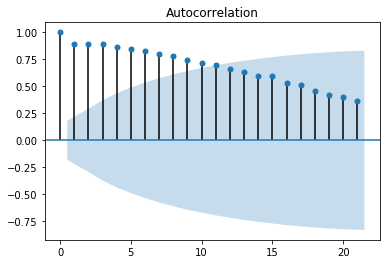

In [6]:
plot_acf(canada_final)

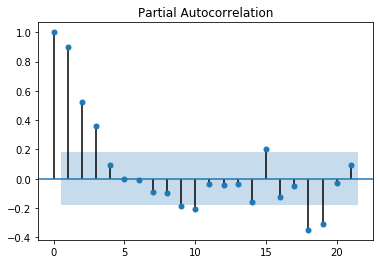

In [7]:
plot_pacf(canada_final)

In [8]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  predictions = list()
  for i in range(len(test)):
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1)
    pred_1= pred[0]
    predictions.append(pred_1)
    x = test[i] # observation of the ith record in the test set
    train = np.append(canada_final.iloc[(i+1):87].values, x)
	# calculate out of sample error
  #error = np.mean(np.absolute(predictions - test)/ (np.absolute(predictions)+ np.absolute(test)))*100
  error = sklearn.metrics.r2_score(test, predictions)
  return error


def evaluate_models(train, test, p_values, d_values, q_values):
  #best_score, best_cfg = float("inf"), None
  best_score, best_cfg = 0, None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          #sMAPE = evaluate_arima_model(train, test, order)
          r2 = evaluate_arima_model(train, test, order)
          #if sMAPE < best_score:
          if r2 > best_score:
            #best_score, best_cfg = sMAPE, order
            best_score, best_cfg = r2, order
          print('ARIMA%s r2=%.3f' % (order,r2))
        except:
          continue
  print('Best ARIMA%s r2=%.3f' % (best_cfg, best_score))

In [9]:
# evaluate parameters
train = canada_final.iloc[0:87].values
test = canada_final.iloc[87:].values
p_values = range(0, 11)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) r2=0.352
ARIMA(0, 0, 2) r2=0.392
ARIMA(0, 0, 3) r2=0.014
ARIMA(0, 0, 4) r2=0.433
ARIMA(0, 1, 1) r2=-0.920
ARIMA(0, 1, 2) r2=-1.074
ARIMA(0, 1, 3) r2=-0.969
ARIMA(0, 1, 4) r2=-0.977
ARIMA(0, 2, 1) r2=0.856
ARIMA(0, 2, 2) r2=-0.467
ARIMA(0, 2, 3) r2=-0.493
ARIMA(0, 2, 4) r2=-0.633
ARIMA(1, 0, 0) r2=0.805
ARIMA(1, 0, 1) r2=-0.151
ARIMA(1, 0, 2) r2=-0.475
ARIMA(1, 0, 3) r2=-0.454
ARIMA(1, 0, 4) r2=-0.541
ARIMA(1, 1, 0) r2=0.098
ARIMA(1, 1, 1) r2=-1.161
ARIMA(1, 1, 2) r2=-0.541
ARIMA(1, 1, 3) r2=-0.564
ARIMA(1, 1, 4) r2=-0.530
ARIMA(1, 2, 0) r2=0.691
ARIMA(2, 0, 0) r2=0.252
ARIMA(2, 0, 1) r2=-0.454
ARIMA(2, 0, 2) r2=-0.081
ARIMA(2, 1, 0) r2=-0.583
ARIMA(2, 1, 1) r2=-0.955
ARIMA(2, 1, 2) r2=-0.877
ARIMA(2, 1, 3) r2=-0.432
ARIMA(2, 2, 0) r2=0.851
ARIMA(3, 0, 0) r2=-0.227
ARIMA(3, 0, 1) r2=-0.371
ARIMA(3, 1, 0) r2=-0.836
ARIMA(3, 1, 1) r2=-0.927
ARIMA(3, 2, 0) r2=0.743
ARIMA(3, 2, 1) r2=-0.066
ARIMA(4, 0, 0) r2=-0.356
ARIMA(4, 0, 1) r2=-0.387
ARIMA(4, 1, 0) r2=-0.914
ARIMA(4, 2, 0) r2=0.660
ARIMA(4, 2, 1) r2=-0.191
ARIMA(5, 0, 0) r2=-0.326
ARIMA(5, 1, 0) r2=-0.979
ARIMA(5, 2, 0) r2=0.630
ARIMA(5, 2, 1) r2=-0.319
ARIMA(6, 0, 0) r2=-0.289
ARIMA(6, 1, 0) r2=-0.912
ARIMA(7, 0, 0) r2=-0.224
ARIMA(7, 1, 0) r2=-0.963
ARIMA(8, 0, 0) r2=-0.337
ARIMA(8, 1, 0) r2=-0.894
ARIMA(9, 0, 0) r2=-0.386
ARIMA(9, 1, 0) r2=-0.171
ARIMA(10, 0, 0) r2=0.151
ARIMA(10, 1, 0) r2=-0.167
Best ARIMA(0, 2, 1) r2=0.856

In [10]:
df = spark.createDataFrame(canada_final.iloc[0:87])

df.agg({'canada_cases': 'variance'}).show()


+----------------------+
variance(canada_cases)|
+----------------------+
 530297.3897353649|
+----------------------+

In [11]:
train = (canada_final.iloc[0:87].values)
test = (canada_final.iloc[87:].values)
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(0,2,1))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(canada_final.iloc[(i+1):87].values, x)

In [12]:
#oneD_predictions = DataFrame(predictions).cumsum()
#test_1day = DataFrame(test).cumsum()
oneD_predictions = predictions
test_1day = test
#smape = np.sum(np.absolute(oneD_predictions - test_1day))/ np.sum((oneD_predictions)+ (test_1day))*100
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ ((np.absolute(oneD_predictions)+ np.absolute(test_1day))))*100
smape

Out[6]: 4.499333659567028

In [13]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[7]: 91.45587509252992

In [14]:
import sklearn.metrics

r2 = sklearn.metrics.r2_score(test_1day, oneD_predictions)
r2

Out[8]: 0.8561885374274247

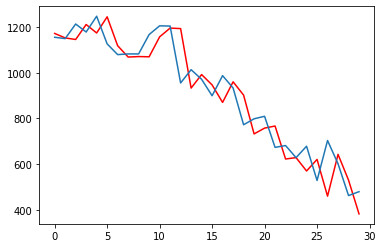

In [15]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [16]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  predictions = list()
  for i in range(len(test)):
    model = ARIMA(train, order=(arima_order))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=7)
    pred_7= pred[0][6] # prediction for 7th day
    predictions.append(pred_7)
    if i<=5:
      x = canada_final.iloc[81:87].values[i]
    else:
      x = test[i] # observation of the ith record in the test set
    train = np.append(canada_final.iloc[(i+1):81].values, x)
  #error = np.mean(np.absolute(predictions - test)/ (np.absolute(predictions)+ np.absolute(test)))*100
  error = sklearn.metrics.r2_score(test, predictions)
  return error


def evaluate_models(train, test, p_values, d_values, q_values):
  #best_score, best_cfg = float("inf"), None
  best_score, best_cfg = 0, None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          #sMAPE = evaluate_arima_model(train, test, order)
          r2 = evaluate_arima_model(train, test, order)
          #if sMAPE < best_score:
          if r2 > best_score:
            #best_score, best_cfg = sMAPE, order
            best_score, best_cfg = r2, order
          print('ARIMA%s r2=%.3f' % (order,r2))
        except:
          continue
  print('Best ARIMA%s r2=%.3f' % (best_cfg, best_score))

In [17]:
# evaluate parameters
train = canada_final.iloc[0:81].values
test = canada_final.iloc[87:].values
p_values = range(0, 11)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) r2=-1.127
ARIMA(0, 0, 2) r2=-1.082
ARIMA(0, 0, 3) r2=-1.025
ARIMA(0, 0, 4) r2=-0.975
ARIMA(0, 1, 1) r2=-6.978
ARIMA(0, 1, 2) r2=-4.168
ARIMA(0, 1, 3) r2=-3.997
ARIMA(0, 1, 4) r2=-4.130
ARIMA(0, 2, 1) r2=-0.847
ARIMA(0, 2, 3) r2=-0.512
ARIMA(0, 2, 4) r2=-0.722
ARIMA(1, 0, 0) r2=0.123
ARIMA(1, 0, 1) r2=-1.178
ARIMA(1, 0, 2) r2=-0.201
ARIMA(1, 0, 3) r2=-0.871
ARIMA(1, 0, 4) r2=-0.272
ARIMA(1, 1, 0) r2=-0.557
ARIMA(1, 1, 1) r2=-5.047
ARIMA(1, 1, 2) r2=-3.691
ARIMA(1, 1, 3) r2=-4.012
ARIMA(1, 2, 0) r2=-85.686
ARIMA(2, 0, 0) r2=0.501
ARIMA(2, 0, 1) r2=-0.666
ARIMA(2, 1, 0) r2=-1.782
ARIMA(2, 1, 1) r2=-4.012
ARIMA(2, 1, 2) r2=-3.512
ARIMA(2, 2, 0) r2=-102.847
ARIMA(2, 2, 1) r2=0.501
ARIMA(3, 0, 0) r2=0.122
ARIMA(3, 0, 1) r2=-0.188
ARIMA(3, 1, 0) r2=-2.900
ARIMA(3, 1, 1) r2=-3.545
ARIMA(3, 1, 2) r2=-2.832
ARIMA(3, 2, 0) r2=-60.070
ARIMA(3, 2, 1) r2=0.125
ARIMA(4, 0, 0) r2=-0.187
ARIMA(4, 1, 0) r2=-3.059
ARIMA(4, 2, 0) r2=-44.471
ARIMA(4, 2, 1) r2=0.144
ARIMA(5, 0, 0) r2=0.008
ARIMA(5, 1, 0) r2=-4.599
ARIMA(5, 1, 1) r2=-4.760
ARIMA(5, 2, 0) r2=-24.065
ARIMA(6, 0, 0) r2=-0.163
ARIMA(6, 1, 0) r2=-4.680
ARIMA(7, 0, 0) r2=0.072
ARIMA(7, 1, 0) r2=-5.313
ARIMA(8, 0, 0) r2=0.210
ARIMA(8, 1, 0) r2=-4.228
ARIMA(9, 0, 0) r2=0.593
ARIMA(9, 1, 0) r2=-1.900
ARIMA(10, 0, 0) r2=0.765
ARIMA(10, 1, 0) r2=-2.116
Best ARIMA(10, 0, 0) r2=0.765

In [18]:
df = spark.createDataFrame(canada_final.iloc[0:81])

df.agg({'canada_cases': 'variance'}).show()


+----------------------+
variance(canada_cases)|
+----------------------+
 544347.8111111112|
+----------------------+

In [19]:
train = canada_final.iloc[0:81].values
test = canada_final.iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  #model = ARIMA(train, order=(1,0,0))
  model = ARIMA(train, order=(10,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = canada_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(canada_final.iloc[(i+1):81].values, x)
  #print(train)

In [20]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ ((np.absolute(predictions_7day)+ np.absolute(test_7day))))*100
smape

Out[23]: 14.684601318267324

In [21]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[24]: 116.86002494722977

In [22]:
r2 = sklearn.metrics.r2_score(test_7day, predictions_7day)
r2

Out[25]: 0.7651977613601276

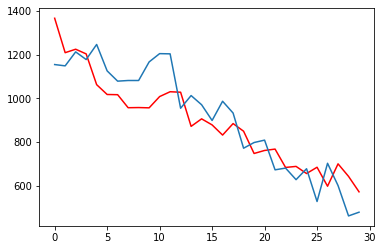

In [23]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [24]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  predictions = list()
  for i in range(len(test)):
    model = ARIMA(train, order=(arima_order))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=14)
    pred_14= pred[0][13] # prediction for 14th day
    predictions.append(pred_14)
    if i<=11:
      x = canada_final.iloc[75:87].values[i]
    else:
      x = test[i] # observation of the ith record in the test set
    train = np.append(canada_final.iloc[(i+1):75].values, x)
  #error = np.mean(np.absolute(predictions - test)/ (np.absolute(predictions)+ np.absolute(test)))*100
  error = sklearn.metrics.r2_score(test, predictions)
  return error


def evaluate_models(train, test, p_values, d_values, q_values):
  #best_score, best_cfg = float("inf"), None
  best_score, best_cfg = 0, None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          #sMAPE = evaluate_arima_model(train, test, order)
          r2 = evaluate_arima_model(train, test, order)
          #if sMAPE < best_score:
          if r2 > best_score:
            #best_score, best_cfg = sMAPE, order
            best_score, best_cfg = r2, order
          print('ARIMA%s r2=%.3f' % (order,r2))
        except:
          continue
  print('Best ARIMA%s r2=%.3f' % (best_cfg, best_score))

In [25]:
# evaluate parameters
train = canada_final.iloc[0:75].values
test = canada_final['canada_cases'].iloc[87:].values
p_values = range(0, 11)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) r2=-1.165
ARIMA(0, 0, 2) r2=-1.133
ARIMA(0, 0, 3) r2=-1.055
ARIMA(0, 0, 4) r2=-1.042
ARIMA(0, 1, 1) r2=-17.075
ARIMA(0, 1, 2) r2=-13.133
ARIMA(0, 2, 1) r2=-10.666
ARIMA(1, 0, 0) r2=-0.197
ARIMA(1, 0, 2) r2=-1.706
ARIMA(1, 1, 0) r2=-8.018
ARIMA(1, 1, 1) r2=-15.080
ARIMA(1, 1, 3) r2=-9.989
ARIMA(1, 2, 0) r2=-651.886
ARIMA(2, 0, 0) r2=0.146
ARIMA(2, 0, 1) r2=-1.914
ARIMA(2, 1, 0) r2=-11.245
ARIMA(2, 1, 1) r2=-13.756
ARIMA(2, 1, 2) r2=-11.616
ARIMA(2, 2, 0) r2=-211.451
ARIMA(3, 0, 0) r2=-1.208
ARIMA(3, 0, 1) r2=-1.735
ARIMA(3, 1, 0) r2=-12.557
ARIMA(3, 1, 1) r2=-13.764
ARIMA(3, 2, 0) r2=-96.974
ARIMA(4, 0, 0) r2=-1.728
ARIMA(4, 0, 1) r2=-3.995
ARIMA(4, 1, 0) r2=-13.395
ARIMA(4, 1, 1) r2=-13.716
ARIMA(4, 2, 0) r2=-47.013
ARIMA(5, 0, 0) r2=-1.711
ARIMA(5, 1, 0) r2=-13.997
ARIMA(5, 2, 0) r2=-23.733
ARIMA(6, 0, 0) r2=-1.752
ARIMA(6, 1, 0) r2=-13.810
ARIMA(7, 0, 0) r2=-1.250
ARIMA(7, 1, 0) r2=-13.158
ARIMA(8, 0, 0) r2=-0.837
ARIMA(8, 1, 0) r2=-9.993
ARIMA(8, 1, 1) r2=-6.449
ARIMA(9, 0, 0) r2=0.364
ARIMA(9, 1, 0) r2=-4.430
ARIMA(10, 0, 0) r2=-0.010
ARIMA(10, 0, 1) r2=-0.303
ARIMA(10, 1, 0) r2=-4.738
Best ARIMA(9, 0, 0) r2=0.364

In [26]:
df = spark.createDataFrame(canada_final.iloc[0:75])

df.agg({'canada_cases': 'variance'}).show()


+----------------------+
variance(canada_cases)|
+----------------------+
 515553.4619819819|
+----------------------+

In [27]:
train = canada_final.iloc[0:75].values
test = canada_final['canada_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(9,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = canada_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(canada_final.iloc[(i+1):75].values, x)

In [28]:
# startig 05-25-2020
predictions_14day = predictions
test_14day = test
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[30]: 7.5739779156245275

In [29]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[31]: 192.29129118766522

In [30]:
r2 = sklearn.metrics.r2_score(test_14day, predictions_14day)
r2

Out[32]: 0.3642453942905538

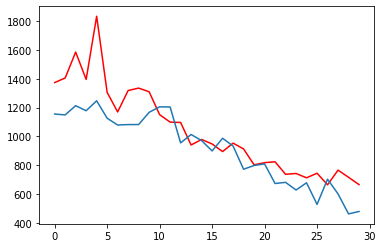

In [31]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [32]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  predictions = list()
  for i in range(len(test)):
    model = ARIMA(train, order=(arima_order))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=21)
    pred_21= pred[0][20] # prediction for 21st day
    predictions.append(pred_21)
    if i<=19:
      x = canada_final.iloc[67:87].values[i]
    else:
      x = test[i] # observation of the ith record in the test set
    train = np.append(canada_final.iloc[(i+1):67].values, x)
  #error = np.mean(np.absolute(predictions - test)/ (np.absolute(predictions)+ np.absolute(test)))*100
  error = sklearn.metrics.r2_score(test, predictions)
  return error


def evaluate_models(train, test, p_values, d_values, q_values):
  #best_score, best_cfg = float("inf"), None
  best_score, best_cfg = 0, None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          #sMAPE = evaluate_arima_model(train, test, order)
          r2 = evaluate_arima_model(train, test, order)
          #if sMAPE < best_score:
          if r2 > best_score:
            #best_score, best_cfg = sMAPE, order
            best_score, best_cfg = r2, order
          print('ARIMA%s r2=%.3f' % (order,r2))
        except:
          continue
  print('Best ARIMA%s r2=%.3f' % (best_cfg, best_score))

In [33]:
# evaluate parameters
train = canada_final.iloc[0:67].values
test = canada_final['canada_cases'].iloc[87:].values
p_values = range(0, 11)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) r2=-1.549
ARIMA(0, 0, 2) r2=-1.546
ARIMA(0, 0, 3) r2=-1.466
ARIMA(0, 0, 4) r2=-1.318
ARIMA(0, 1, 1) r2=-44.956
ARIMA(0, 1, 2) r2=-37.378
ARIMA(0, 2, 1) r2=-46.201
ARIMA(1, 0, 0) r2=-0.851
ARIMA(1, 1, 0) r2=-21.205
ARIMA(1, 1, 1) r2=-39.517
ARIMA(1, 2, 0) r2=-2855.107
ARIMA(2, 0, 0) r2=0.447
ARIMA(2, 1, 0) r2=-33.217
ARIMA(2, 1, 1) r2=-35.715
ARIMA(2, 2, 0) r2=-471.549
ARIMA(3, 0, 0) r2=-3.012
ARIMA(3, 1, 0) r2=-34.854
ARIMA(3, 1, 1) r2=-37.128
ARIMA(3, 2, 0) r2=-149.627
ARIMA(4, 0, 0) r2=-4.104
ARIMA(4, 1, 0) r2=-34.654
ARIMA(4, 1, 1) r2=-39.094
ARIMA(4, 2, 0) r2=-78.055
ARIMA(5, 0, 0) r2=-3.418
ARIMA(5, 1, 0) r2=-33.377
ARIMA(5, 1, 1) r2=-37.194
ARIMA(6, 0, 0) r2=-2.519
ARIMA(6, 1, 0) r2=-39.009
ARIMA(6, 1, 1) r2=-41.648
ARIMA(7, 0, 0) r2=-3.139
ARIMA(7, 1, 0) r2=-37.525
ARIMA(7, 1, 1) r2=-41.014
ARIMA(8, 0, 0) r2=-5.072
ARIMA(9, 0, 0) r2=-8.996
Best ARIMA(2, 0, 0) r2=0.447

In [34]:
df = spark.createDataFrame(canada_final.iloc[0:67])

df.agg({'canada_cases': 'variance'}).show()


+----------------------+
variance(canada_cases)|
+----------------------+
 447398.3930348259|
+----------------------+

In [35]:
train = canada_final.iloc[0:67].values
test = canada_final['canada_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(2,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=21)
  pred_21= pred[0][20] # prediction for 21st day
  predictions.append(pred_21)
  x = test[i] # observation of the ith record in the test set
  if i<=19:
    x = canada_final.iloc[67:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(canada_final.iloc[(i+1):67].values, x)

In [36]:
# startig 05-25-2020
predictions_21day = predictions
test_21day = test
smape = np.mean(np.absolute(predictions_21day - test_21day)/ (np.absolute(predictions_21day)+ np.absolute(test_21day)))*100
smape

Out[20]: 8.133795618310614

In [37]:
rmse = np.sqrt(mean_squared_error(test_21day, predictions_21day))
rmse

Out[21]: 179.28421965144457

In [38]:
r2 = sklearn.metrics.r2_score(test_21day, predictions_21day)
r2

Out[24]: 0.4473446044949534

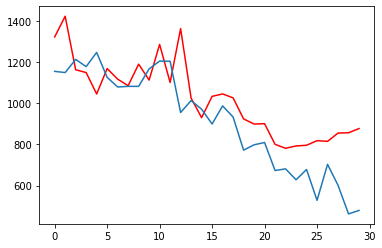

In [39]:
plt.plot(predictions_21day, color='red')
plt.plot(test_21day)

# Japan

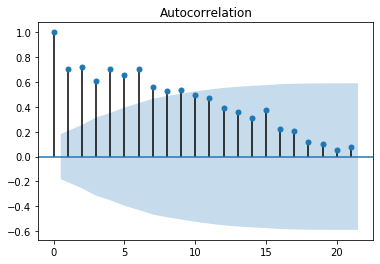

In [41]:
plot_acf(japan_final['japan_cases'])

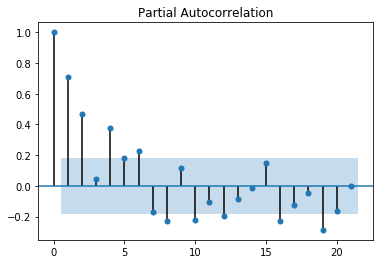

In [42]:
plot_pacf(japan_final)

In [43]:
# evaluate parameters
train = japan_final.iloc[0:87].values
test = japan_final['japan_cases'].iloc[87:].values
p_values = [0, 1, 2, 4, 6, 8, 9, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values) #skipping differencing twice since it produces negative values

ARIMA(0, 0, 1) MSE=114434.506
ARIMA(0, 0, 2) MSE=138922.011
ARIMA(0, 1, 1) MSE=589022.448
ARIMA(0, 1, 2) MSE=863390.697
ARIMA(0, 2, 1) MSE=5341.647
ARIMA(0, 2, 2) MSE=485728.223
ARIMA(1, 0, 0) MSE=18500.268
ARIMA(1, 0, 1) MSE=483291.461
ARIMA(1, 0, 2) MSE=775942.720
ARIMA(1, 1, 0) MSE=385043.587
ARIMA(1, 1, 1) MSE=820246.427
ARIMA(1, 1, 2) MSE=715249.440
ARIMA(1, 2, 0) MSE=132033.197
ARIMA(2, 0, 0) MSE=384466.497
ARIMA(2, 0, 1) MSE=713915.718
ARIMA(2, 0, 2) MSE=659207.882
ARIMA(2, 1, 0) MSE=741874.447
ARIMA(2, 1, 1) MSE=804674.551
ARIMA(2, 2, 0) MSE=4124.514
ARIMA(4, 0, 0) MSE=725066.587
ARIMA(4, 1, 0) MSE=786172.844
ARIMA(4, 2, 0) MSE=129176.847
ARIMA(4, 2, 1) MSE=617908.208
ARIMA(6, 0, 0) MSE=675183.072
ARIMA(6, 1, 0) MSE=771305.140
ARIMA(6, 2, 0) MSE=344924.370
ARIMA(8, 0, 0) MSE=700680.028
ARIMA(8, 1, 0) MSE=796202.815
ARIMA(9, 0, 0) MSE=748746.305
ARIMA(9, 1, 0) MSE=662320.601
ARIMA(10, 0, 0) MSE=619685.873
ARIMA(10, 1, 0) MSE=668503.774
Best ARIMA(2, 2, 0) MSE=4124.514

In [44]:
train = japan_final.iloc[0:87].values
test = japan_final['japan_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(2,1,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(japan_final.iloc[(i+1):87].values, x)

In [45]:
oneD_predictions = predictions
test_1day = test
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ (np.absolute(oneD_predictions)+ np.absolute(test_1day)))*100
smape

Out[84]: 27.489124785415562

In [46]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[85]: 29.705662918856223

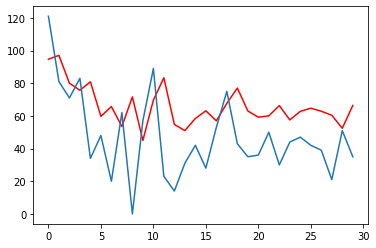

In [47]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [48]:
train = japan_final.iloc[0:81].values
test = japan_final['japan_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  model = ARIMA(train, order=(2,1,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = japan_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(japan_final.iloc[(i+1):81].values, x)
  #print(train)

In [49]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ (np.absolute(predictions_7day)+ np.absolute(test_7day)))*100
smape

Out[88]: 43.62155652592353

In [50]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[89]: 74.2006398249766

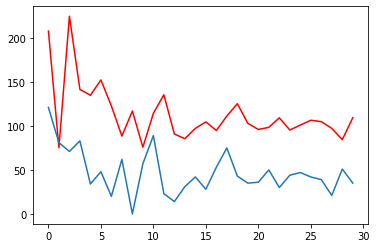

In [51]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [52]:
train = japan_final.iloc[0:75].values
test = japan_final['japan_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(2,1,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = japan_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(japan_final.iloc[(i+1):75].values, x)

In [53]:
# startig 05-25-2020
predictions_14day = np.array(predictions[0:17])
test_14day = test[13:30]
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[92]: 60.43586897953899

In [54]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[93]: 167.67368424526123

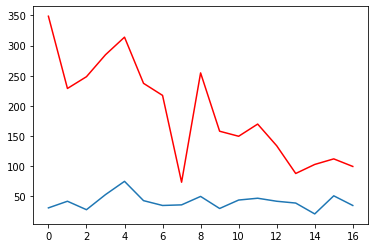

In [55]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [56]:
train = japan_final.iloc[0:58].values
test = japan_final['japan_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(2,1,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=30)
	pred_30= pred[0][29] # prediction for 14th day
	predictions.append(pred_30)
	x = test[i] # observation of the ith record in the test set
	train = np.append(train, x)

In [57]:
# startig 05-25-2020
predictions_30day = np.array(predictions[0:1])
test_30day = test[29:30]
smape = np.mean(np.absolute(predictions_30day - test_30day)/ (np.absolute(predictions_30day)+ np.absolute(test_30day)))*100
smape

Out[96]: 52.40170639585011

In [58]:
rmse = np.sqrt(mean_squared_error(test_30day, predictions_30day))
rmse

Out[97]: 77.06409557904196

# Italy

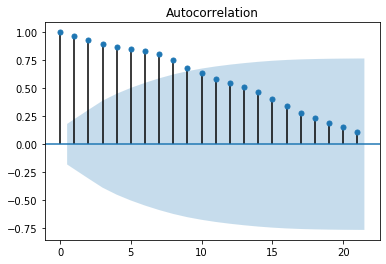

In [60]:
plot_acf(italy_final['italy_cases'])

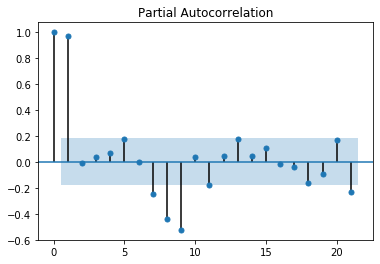

In [61]:
plot_pacf(italy_final)

In [62]:
# evaluate parameters
train = italy_final.iloc[0:87].values
test = italy_final['italy_cases'].iloc[87:].values
p_values = [0, 1, 2, 4, 6, 8, 9, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=71222.101
ARIMA(0, 0, 2) MSE=83720.907
ARIMA(0, 1, 1) MSE=321805.930
ARIMA(0, 1, 2) MSE=406749.561
ARIMA(0, 2, 1) MSE=55300.650
ARIMA(0, 2, 2) MSE=255514.346
ARIMA(1, 0, 0) MSE=49888.891
ARIMA(1, 0, 1) MSE=240507.463
ARIMA(1, 0, 2) MSE=338264.812
ARIMA(1, 1, 0) MSE=195539.220
ARIMA(1, 1, 1) MSE=400633.383
ARIMA(1, 1, 2) MSE=325148.359
ARIMA(1, 2, 0) MSE=105135.103
ARIMA(2, 0, 0) MSE=180546.797
ARIMA(2, 0, 2) MSE=271342.354
ARIMA(2, 1, 0) MSE=336624.515
ARIMA(2, 1, 1) MSE=380953.453
ARIMA(2, 2, 0) MSE=52313.503
ARIMA(4, 0, 0) MSE=314379.865
ARIMA(4, 1, 0) MSE=373625.713
ARIMA(4, 2, 0) MSE=67919.316
ARIMA(6, 0, 0) MSE=297088.010
ARIMA(6, 1, 0) MSE=367165.641
ARIMA(6, 2, 0) MSE=151689.561
ARIMA(8, 0, 0) MSE=306422.931
ARIMA(8, 1, 0) MSE=376212.804
ARIMA(9, 0, 0) MSE=321177.215
ARIMA(9, 1, 0) MSE=278395.151
ARIMA(10, 0, 0) MSE=230375.033
ARIMA(10, 1, 0) MSE=278254.682
Best ARIMA(1, 0, 0) MSE=49888.891

In [63]:
train = italy_final.iloc[0:87].values
test = italy_final['italy_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(italy_final.iloc[(i+1):87].values, x)

In [64]:
oneD_predictions = predictions
test_1day = test
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ (np.absolute(oneD_predictions)+ np.absolute(test_1day)))*100
smape

Out[102]: 26.06911698311874

In [65]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[103]: 230.78186454494343

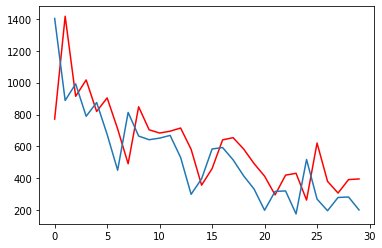

In [66]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [67]:
train = italy_final.iloc[0:81].values
test = italy_final['italy_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  model = ARIMA(train, order=(1,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = italy_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(italy_final.iloc[(i+1):81].values, x)
  #print(train)

In [68]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ (np.absolute(predictions_7day)+ np.absolute(test_7day)))*100
smape

Out[106]: 36.210899816049896

In [69]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[107]: 578.7038197222856

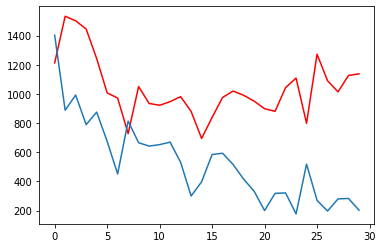

In [70]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [71]:
train = italy_final.iloc[0:75].values
test = italy_final['italy_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(1,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = italy_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(italy_final.iloc[(i+1):75].values, x)

In [72]:
# startig 05-25-2020
predictions_14day = np.array(predictions[0:17])
test_14day = test[13:30]
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[110]: 64.58055231452092

In [73]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[111]: 1255.546125576895

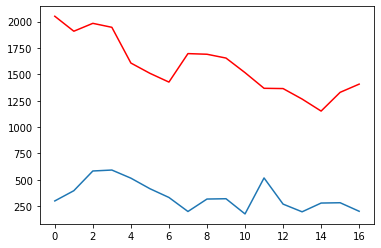

In [74]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [75]:
train = italy_final.iloc[0:58].values
test = italy_final['italy_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=30)
	pred_30= pred[0][29] # prediction for 14th day
	predictions.append(pred_30)
	x = test[i] # observation of the ith record in the test set
	train = np.append(train, x)

In [76]:
# startig 05-25-2020
predictions_30day = np.array(predictions[0:1])
test_30day = test[29:30]
smape = np.mean(np.absolute(predictions_30day - test_30day)/ (np.absolute(predictions_30day)+ np.absolute(test_30day)))*100
smape

Out[114]: 72.75884789705115

In [77]:
rmse = np.sqrt(mean_squared_error(test_30day, predictions_30day))
rmse

Out[115]: 1079.0503441015146

# UK

In [79]:
uk_final = uk_final.fillna(method='ffill')

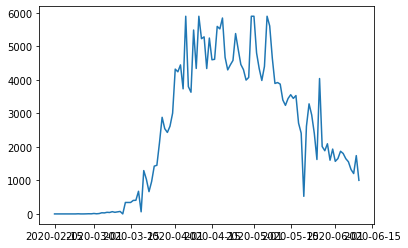

In [80]:
plt.plot(uk_final)

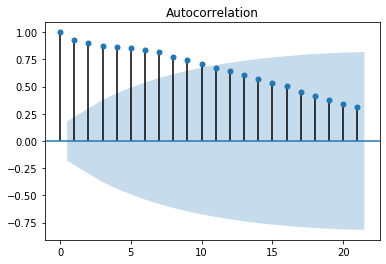

In [81]:
plot_acf(uk_final)

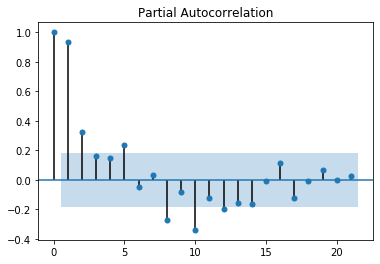

In [82]:
plot_pacf(uk_final)

In [83]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  predictions = list()
  for i in range(len(test)):
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1)
    pred_1= pred[0]
    predictions.append(pred_1)
    x = test[i] # observation of the ith record in the test set
    train = np.append(uk_final.iloc[(i+1):87].values, x)
	# calculate out of sample error
  #error = np.mean(np.absolute(predictions - test)/ (np.absolute(predictions)+ np.absolute(test)))*100
  error = sklearn.metrics.r2_score(test, predictions)
  return error


def evaluate_models(train, test, p_values, d_values, q_values):
  #best_score, best_cfg = float("inf"), None
  best_score, best_cfg = 0, None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          #sMAPE = evaluate_arima_model(train, test, order)
          r2 = evaluate_arima_model(train, test, order)
          #if sMAPE < best_score:
          if r2 > best_score:
            #best_score, best_cfg = sMAPE, order
            best_score, best_cfg = r2, order
          print('ARIMA%s r2=%.3f' % (order,r2))
        except:
          continue
  print('Best ARIMA%s r2=%.3f' % (best_cfg, best_score))

In [84]:
# evaluate parameters
train = uk_final.iloc[0:87].values
test = uk_final.iloc[87:].values
p_values = range(0, 11)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 0) r2=-1.543
ARIMA(0, 0, 1) r2=0.066
ARIMA(0, 0, 2) r2=0.003
ARIMA(0, 0, 3) r2=0.051
ARIMA(0, 0, 4) r2=-0.073
ARIMA(0, 1, 0) r2=0.045
ARIMA(0, 1, 1) r2=-0.677
ARIMA(0, 1, 2) r2=-0.679
ARIMA(0, 1, 3) r2=-0.686
ARIMA(0, 2, 0) r2=-4.574
ARIMA(0, 2, 1) r2=0.031
ARIMA(1, 0, 0) r2=0.103
ARIMA(1, 0, 1) r2=-0.295
ARIMA(1, 0, 2) r2=-0.289
ARIMA(1, 0, 3) r2=-0.292
ARIMA(1, 1, 0) r2=-0.179
ARIMA(1, 1, 1) r2=-0.687
ARIMA(1, 2, 0) r2=-0.948
ARIMA(2, 0, 0) r2=-0.057
ARIMA(2, 0, 1) r2=-0.293
ARIMA(2, 1, 0) r2=-0.308
ARIMA(2, 1, 1) r2=-0.679
ARIMA(2, 2, 0) r2=-0.162
ARIMA(3, 0, 0) r2=-0.130
ARIMA(3, 0, 1) r2=-0.263
ARIMA(3, 1, 0) r2=-0.371
ARIMA(3, 1, 1) r2=-0.760
ARIMA(3, 2, 0) r2=-0.067
ARIMA(4, 0, 0) r2=-0.160
ARIMA(4, 0, 1) r2=-0.335
ARIMA(4, 1, 0) r2=-0.927
ARIMA(4, 1, 1) r2=-1.156
ARIMA(4, 2, 0) r2=-0.156
ARIMA(4, 2, 1) r2=-0.356
ARIMA(5, 0, 0) r2=-0.512
ARIMA(5, 0, 1) r2=-0.505
ARIMA(5, 1, 0) r2=-1.364
ARIMA(5, 1, 1) r2=-1.341
ARIMA(5, 2, 0) r2=0.016
ARIMA(5, 2, 1) r2=-1.003
ARIMA(6, 0, 0) r2=-0.641
ARIMA(6, 1, 0) r2=-1.315
ARIMA(6, 2, 0) r2=-0.704
ARIMA(6, 2, 1) r2=-2.560
ARIMA(6, 2, 2) r2=-1.814
ARIMA(7, 0, 0) r2=-0.469
ARIMA(7, 1, 0) r2=-2.085
ARIMA(7, 1, 1) r2=-3.302
ARIMA(7, 1, 2) r2=-2.143
ARIMA(8, 0, 0) r2=-1.551
ARIMA(8, 1, 0) r2=-2.269
ARIMA(8, 1, 1) r2=-2.875
ARIMA(8, 1, 2) r2=-2.659
ARIMA(9, 0, 0) r2=-1.900
ARIMA(9, 1, 0) r2=-2.419
ARIMA(10, 0, 0) r2=-2.205
ARIMA(10, 0, 1) r2=-2.560
ARIMA(10, 1, 0) r2=-2.734
Best ARIMA(1, 0, 0) r2=0.103

In [85]:
train = uk_final.iloc[0:87].values
test = uk_final.iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(uk_final.iloc[(i+1):87].values, x)

In [86]:
oneD_predictions = predictions
test_1day = test
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ (np.absolute(oneD_predictions)+ np.absolute(test_1day)))*100
smape

Out[64]: 13.485017582735907

In [87]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[65]: 839.5570943752728

In [88]:
r2 = sklearn.metrics.r2_score(test_1day, oneD_predictions)
r2

Out[67]: 0.10319628362829358

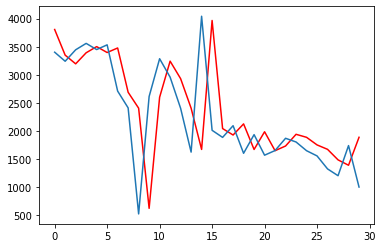

In [89]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [90]:
train = uk_final.iloc[0:81].values
test = uk_final['uk_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  model = ARIMA(train, order=(1,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = uk_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(uk_final.iloc[(i+1):81].values, x)
  #print(train)

In [91]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ (np.absolute(predictions_7day)+ np.absolute(test_7day)))*100
smape

Out[11]: 15.887669695512605

In [92]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[12]: 933.93302548495

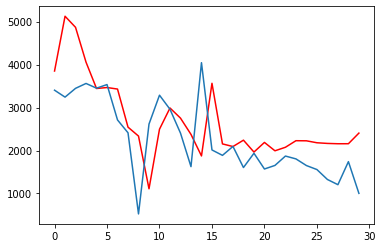

In [93]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [94]:
train = uk_final.iloc[0:75].values
test = uk_final['uk_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(1,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = uk_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(uk_final.iloc[(i+1):75].values, x)

In [95]:
# startig 05-25-2020
predictions_14day = np.array(predictions[0:17])
test_14day = test[13:30]
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[15]: 30.52589485375504

In [96]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[16]: 1668.2807683601263

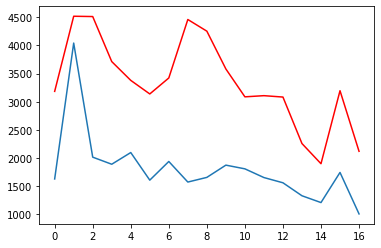

In [97]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [98]:
train = uk_final.iloc[0:87].values
test = uk_final['uk_cases'].iloc[58:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=30)
	pred_30= pred[0][29] # prediction for 14th day
	predictions.append(pred_30)
	x = test[i] # observation of the ith record in the test set
	train = np.append(train, x)

In [99]:
# startig 05-25-2020
predictions_30day = np.array(predictions[0:1])
test_30day = test[29:30]
smape = np.mean(np.absolute(predictions_30day - test_30day)/ (np.absolute(predictions_30day)+ np.absolute(test_30day)))*100
smape

Out[19]: 46.12369595959562

In [100]:
rmse = np.sqrt(mean_squared_error(test_30day, predictions_30day))
rmse

Out[20]: 1717.343751448886

# Germany

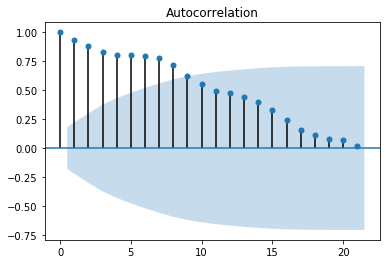

In [102]:
plot_acf(germany_final['germany_cases'])

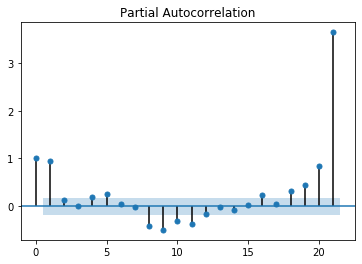

In [103]:
plot_pacf(germany_final)

In [104]:
# evaluate parameters
train = germany_final.iloc[0:87].values
test = germany_final['germany_cases'].iloc[87:].values
p_values = [0, 1, 2, 4, 6, 8, 9, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=151550.607
ARIMA(0, 0, 2) MSE=159328.797
ARIMA(0, 1, 1) MSE=366212.278
ARIMA(0, 1, 2) MSE=455737.770
ARIMA(0, 2, 1) MSE=109523.448
ARIMA(0, 2, 2) MSE=285721.840
ARIMA(1, 0, 0) MSE=106164.384
ARIMA(1, 0, 1) MSE=283542.387
ARIMA(1, 0, 2) MSE=384396.735
ARIMA(1, 1, 0) MSE=236436.971
ARIMA(1, 1, 1) MSE=448569.973
ARIMA(1, 1, 2) MSE=371042.386
ARIMA(1, 2, 0) MSE=185688.910
ARIMA(2, 0, 0) MSE=221123.869
ARIMA(2, 0, 1) MSE=366202.454
ARIMA(2, 0, 2) MSE=314150.500
ARIMA(2, 1, 0) MSE=381603.925
ARIMA(2, 1, 1) MSE=429661.811
ARIMA(2, 1, 2) MSE=424545.373
ARIMA(2, 2, 0) MSE=97704.481
ARIMA(4, 0, 0) MSE=360625.977
ARIMA(4, 1, 0) MSE=423910.719
ARIMA(4, 2, 0) MSE=98913.741
ARIMA(6, 0, 0) MSE=343513.011
ARIMA(6, 1, 0) MSE=419148.291
ARIMA(8, 0, 0) MSE=356344.294
ARIMA(8, 1, 0) MSE=424528.873
ARIMA(9, 0, 0) MSE=371031.500
ARIMA(9, 1, 0) MSE=324149.630
ARIMA(10, 0, 0) MSE=275210.327
ARIMA(10, 1, 0) MSE=324300.958
Best ARIMA(2, 2, 0) MSE=97704.481

In [105]:
train = germany_final.iloc[0:87].values
test = germany_final['germany_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,1,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(germany_final.iloc[(i+1):87].values, x)

In [106]:
oneD_predictions = predictions
test_1day = test
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ (np.absolute(oneD_predictions)+ np.absolute(test_1day)))*100
smape

Out[49]: 26.692828650117555

In [107]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[50]: 312.7042827454497

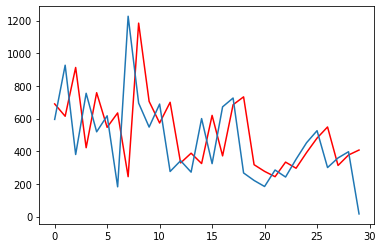

In [108]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [109]:
train = germany_final.iloc[0:81].values
test = germany_final['germany_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  model = ARIMA(train, order=(1,1,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = germany_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(germany_final.iloc[(i+1):81].values, x)
  #print(train)

In [110]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ (np.absolute(predictions_7day)+ np.absolute(test_7day)))*100
smape

Out[53]: 25.562807269146415

In [111]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[54]: 373.27874358697903

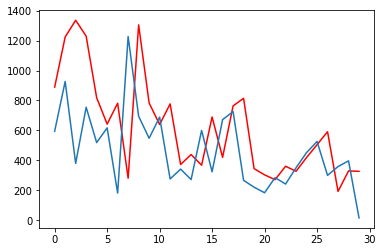

In [112]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [113]:
train = germany_final.iloc[0:75].values
test = germany_final['germany_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(1,1,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = germany_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(germany_final.iloc[(i+1):75].values, x)

In [114]:
# startig 05-25-2020
predictions_14day = np.array(predictions[0:17])
test_14day = test[13:30]
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[57]: 50.201154497658585

In [115]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[58]: 863.4549332398705

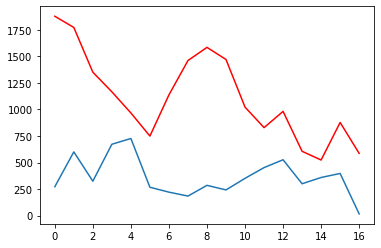

In [116]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [117]:
train = germany_final.iloc[0:87].values
test = germany_final['germany_cases'].iloc[58:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(1,1,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=30)
	pred_30= pred[0][29] # prediction for 14th day
	predictions.append(pred_30)
	x = test[i] # observation of the ith record in the test set
	train = np.append(train, x)

In [118]:
# startig 05-25-2020
predictions_30day = np.array(predictions[0:1])
test_30day = test[29:30]
smape = np.mean(np.absolute(predictions_30day - test_30day)/ (np.absolute(predictions_30day)+ np.absolute(test_30day)))*100
smape

Out[61]: 96.59836938731137

In [119]:
rmse = np.sqrt(mean_squared_error(test_30day, predictions_30day))
rmse

Out[62]: 908.725306287955

# France

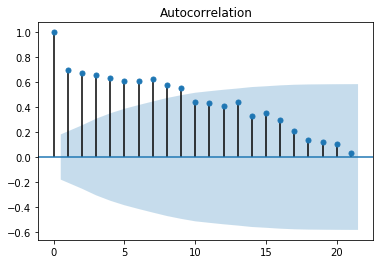

In [121]:
plot_acf(france_final['france_cases'])

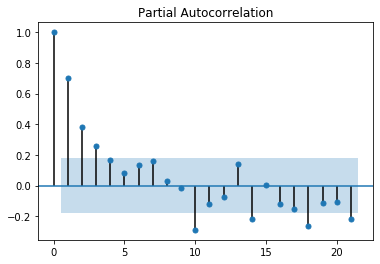

In [122]:
plot_pacf(france_final)

In [123]:
# evaluate parameters
train = france_final.iloc[0:87].values
test = france_final['france_cases'].iloc[87:].values
p_values = [0, 1, 2, 4, 6, 8, 9, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=928231.500
ARIMA(0, 0, 2) MSE=917694.633
ARIMA(0, 1, 1) MSE=958346.058
ARIMA(0, 1, 2) MSE=992341.880
ARIMA(0, 2, 1) MSE=1345134.693
ARIMA(0, 2, 2) MSE=940529.023
ARIMA(1, 0, 0) MSE=1120577.927
ARIMA(1, 0, 1) MSE=996214.179
ARIMA(1, 0, 2) MSE=939223.433
ARIMA(1, 1, 0) MSE=926919.531
ARIMA(1, 1, 1) MSE=991747.944
ARIMA(1, 1, 2) MSE=940859.498
ARIMA(1, 2, 0) MSE=1832971.234
ARIMA(2, 0, 0) MSE=899268.916
ARIMA(2, 0, 1) MSE=925492.430
ARIMA(2, 1, 0) MSE=958362.049
ARIMA(2, 1, 1) MSE=978337.829
ARIMA(2, 1, 2) MSE=980449.354
ARIMA(2, 2, 0) MSE=1236087.210
ARIMA(4, 0, 0) MSE=940669.873
ARIMA(4, 1, 0) MSE=976996.533
ARIMA(4, 2, 0) MSE=948721.990
ARIMA(4, 2, 1) MSE=914379.402
ARIMA(6, 0, 0) MSE=930248.226
ARIMA(6, 1, 0) MSE=973026.037
ARIMA(8, 0, 0) MSE=937451.195
ARIMA(8, 1, 0) MSE=978508.764
ARIMA(9, 0, 0) MSE=946873.828
ARIMA(9, 1, 0) MSE=920374.441
ARIMA(10, 0, 0) MSE=893955.641
ARIMA(10, 1, 0) MSE=920487.279
Best ARIMA(10, 0, 0) MSE=893955.641

In [124]:
train = france_final.iloc[0:87].values
test = france_final['france_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(10,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=1)
	pred_1= pred[0]
	predictions.append(pred_1)
	x = test[i] # observation of the ith record in the test set
	train = np.append(france_final.iloc[(i+1):87].values, x)

In [125]:
oneD_predictions = predictions
test_1day = test
smape = np.mean(np.absolute(oneD_predictions - test_1day)/ (np.absolute(oneD_predictions)+ np.absolute(test_1day)))*100
smape

Out[67]: 57.56763228139602

In [126]:
rmse = np.sqrt(mean_squared_error(test_1day, oneD_predictions))
rmse

Out[68]: 1204.7254748825471

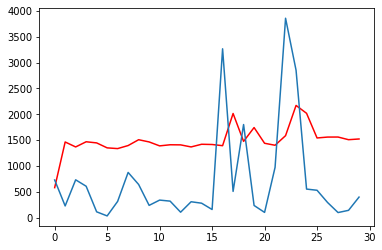

In [127]:
plt.plot(oneD_predictions, color='red')
plt.plot(test_1day)

In [128]:
train = france_final.iloc[0:81].values
test = france_final['france_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  
  model = ARIMA(train, order=(10,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=7)
  pred_7= pred[0][6] # prediction for 7th day
  predictions.append(pred_7)
  if i<=5:
    x = france_final.iloc[81:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(france_final.iloc[(i+1):81].values, x)
  #print(train)

In [129]:
# starting from 05-18
predictions_7day = predictions
test_7day = test
smape = np.mean(np.absolute(predictions_7day - test_7day)/ (np.absolute(predictions_7day)+ np.absolute(test_7day)))*100
smape

Out[72]: 54.34146474015981

In [130]:
rmse = np.sqrt(mean_squared_error(test_7day, predictions_7day))
rmse

Out[73]: 1060.6390822699889

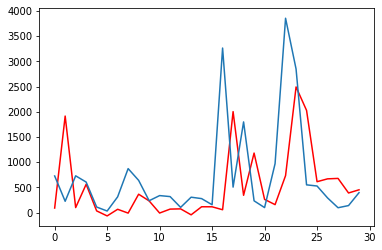

In [131]:
plt.plot(predictions_7day, color='red')
plt.plot(test_7day)

In [132]:
train = france_final.iloc[0:75].values
test = france_final['france_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
  model = ARIMA(train, order=(10,0,0))
  model_fit = model.fit()
  pred = model_fit.forecast(steps=14)
  pred_14= pred[0][13] # prediction for 14th day
  predictions.append(pred_14)
  if i<=11:
    x = france_final.iloc[75:87].values[i]
  else:
    x = test[i] # observation of the ith record in the test set
  train = np.append(france_final.iloc[(i+1):75].values, x)

In [133]:
# startig 05-25-2020
predictions_14day = np.array(predictions[0:17])
test_14day = test[13:30]
smape = np.mean(np.absolute(predictions_14day - test_14day)/ (np.absolute(predictions_14day)+ np.absolute(test_14day)))*100
smape

Out[76]: 57.179765675812575

In [134]:
rmse = np.sqrt(mean_squared_error(test_14day, predictions_14day))
rmse

Out[77]: 1484.4601859416277

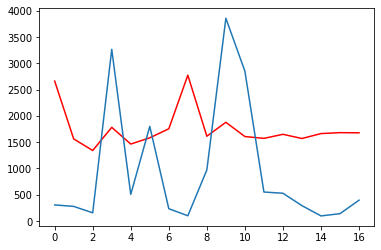

In [135]:
plt.plot(predictions_14day, color='red')
plt.plot(test_14day)

In [136]:
train = france_final.iloc[0:58].values
test = france_final['france_cases'].iloc[87:].values
predictions = list()
for i in range(len(test)):
	model = ARIMA(train, order=(10,0,0))
	model_fit = model.fit()
	pred = model_fit.forecast(steps=30)
	pred_30= pred[0][29] # prediction for 30th day
	predictions.append(pred_30)
	x = test[i] # observation of the ith record in the test set
	train = np.append(train, x)

In [137]:
# startig 05-25-2020
predictions_30day = np.array(predictions[0:1])
test_30day = test[29:30]
smape = np.mean(np.absolute(predictions_30day - test_30day)/ (np.absolute(predictions_30day)+ np.absolute(test_30day)))*100
smape

Out[80]: 49.6577550906443

In [138]:
rmse = np.sqrt(mean_squared_error(test_30day, predictions_30day))
rmse

Out[81]: 783.204197845459